# WORKING NOTEBOOK - JF
<br>

## Exploring MOVIE GROSS CSV

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('zippedData/bom.movie_gross.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/bom.movie_gross.csv'

In [ ]:
df.info()

In [ ]:
#Seems like there are a lot fo null values in 'foreign_gross' column
#A few in 'studio' and 'doemstic_gross'

In [ ]:
df[df['domestic_gross'].isna()]

In [ ]:
df[df['foreign_gross'].isna()]

In [ ]:
df.sort_values(by='domestic_gross', ascending=False)

In [ ]:
df_studio_vc = df['studio'].value_counts()

In [ ]:
df_studio_vc.loc[df_studio_vc  20]

In [ ]:
#REPLACING NULL VALUES IN FOREIGN_GROSS WITH "0"?
#df['foreign_gross'] = df['foreign_gross'].fillna(0)
#df['foreign_gross']

In [ ]:
#CREATING NEW COLUMN TO DIFFERENTIATE BETWEEN MOVIES BETWEEN THAT AIRED ONLY DOMESTICALLY
#df['Foreign_Release'] = np.where(df['foreign_gross'] == 0, True, False)

# Merging the budget dataframe with the IMDB data pulled from SQL

In [5]:
#imports and connect to SQL
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt


conn = sqlite3.connect('../zippedData/im.db')

In [6]:
#creating a dataframe with the info we want to take from the imdb database
imdb_ratings = pd.read_sql(
    """
    SELECT basics.movie_id, basics.primary_title, basics.original_title, basics.runtime_minutes, basics.genres, ratings.averagerating, ratings.numvotes
    FROM movie_basics as basics
        JOIN movie_ratings as ratings
            USING(movie_id)
    """, conn
)

In [7]:
budget_cleaned = pd.read_csv('../zippedData/success.csv')

In [8]:
#removing duplicates from the movie title column in each dataframe before merging them
imdb_ratings = imdb_ratings.drop_duplicates(subset=['primary_title'])
budget_cleaned = budget_cleaned.drop_duplicates(subset=['movie'])


In [9]:
all_movie_data = pd.merge(budget_cleaned, imdb_ratings, left_on='movie', right_on='primary_title', how='inner')


In [10]:
#duplicates sanity check
all_movie_data['movie'].duplicated().value_counts()

False    730
Name: movie, dtype: int64

# Production Budget EDA

In [11]:
all_movie_data

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763
727,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280
728,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917


In [18]:
import numpy as np

In [50]:
df1 = all_movie_data

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            730 non-null    int64  
 1   id                    730 non-null    int64  
 2   release_date          730 non-null    object 
 3   movie                 730 non-null    object 
 4   production_budget     730 non-null    int64  
 5   domestic_gross        730 non-null    int64  
 6   worldwide_gross       730 non-null    int64  
 7   return_on_investment  730 non-null    float64
 8   year                  730 non-null    int64  
 9   movie_id              730 non-null    object 
 10  primary_title         730 non-null    object 
 11  original_title        730 non-null    object 
 12  runtime_minutes       725 non-null    float64
 13  genres                728 non-null    object 
 14  averagerating         730 non-null    float64
 15  numvotes              7

In [20]:
# create a list of our conditions
conditions = [
    (df1['production_budget'] <= 7500000),
    (df1['production_budget'] > 7500000) & (df1['production_budget'] <= 11000000),
    (df1['production_budget'] > 11000000) & (df1['production_budget'] <= 15000000),
    (df1['production_budget'] > 15000000) & (df1['production_budget'] < 100000000),
    (df1['production_budget'] > 100000000)]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3', 'tier_4', 'high_end']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['budget_tier'] = np.select(conditions, values)

# display updated DataFrame
df1

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,budget_tier
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,high_end
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,high_end
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,high_end
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,high_end
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504,high_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780,tier_1
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763,tier_1
727,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280,tier_1
728,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917,tier_1


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            730 non-null    int64  
 1   id                    730 non-null    int64  
 2   release_date          730 non-null    object 
 3   movie                 730 non-null    object 
 4   production_budget     730 non-null    int64  
 5   domestic_gross        730 non-null    int64  
 6   worldwide_gross       730 non-null    int64  
 7   return_on_investment  730 non-null    float64
 8   year                  730 non-null    int64  
 9   movie_id              730 non-null    object 
 10  primary_title         730 non-null    object 
 11  original_title        730 non-null    object 
 12  runtime_minutes       725 non-null    float64
 13  genres                728 non-null    object 
 14  averagerating         730 non-null    float64
 15  numvotes              7

In [21]:
df1['budget_tier'].value_counts()

tier_4      328
tier_1      144
high_end    138
tier_3       57
tier_2       56
0             7
Name: budget_tier, dtype: int64

In [25]:
df_high_end = df1.loc[df1['budget_tier'] == 'high_end']
df_tier4 = df1.loc[df1['budget_tier'] == 'tier_4']
df_tier3 = df1.loc[df1['budget_tier'] == 'tier_3']
df_tier2 = df1.loc[df1['budget_tier'] == 'tier_2']
df_tier1 = df1.loc[df1['budget_tier'] == 'tier_1']

In [26]:
df_high_end.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,runtime_minutes,averagerating,numvotes
count,138.000000,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,138.000000,137.000000,138.000000,1.380000e+02
mean,158.304348,48.434783,1.669725e+08,2.253677e+08,6.694716e+08,3.994879,2014.717391,120.474453,6.934783,3.363133e+05
std,104.031200,27.669836,5.017334e+07,1.341670e+08,3.312168e+08,1.525218,2.345952,19.862054,0.773715,2.512542e+05
min,1.000000,2.000000,1.020000e+08,4.515710e+07,2.291555e+08,2.024848,2011.000000,64.000000,4.600000,5.900000e+01
25%,66.250000,26.250000,1.300000e+08,1.317930e+08,4.090912e+08,2.781272,2013.000000,105.000000,6.425000,1.500528e+05
50%,139.000000,46.000000,1.600000e+08,1.906365e+08,6.087398e+08,3.810594,2014.500000,120.000000,7.000000,2.877105e+05
75%,250.750000,69.000000,1.900000e+08,2.726916e+08,8.164507e+08,4.771426,2017.000000,134.000000,7.500000,4.863940e+05
max,361.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,8.483133,2019.000000,169.000000,8.600000,1.387769e+06


In [27]:
df_tier4.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,runtime_minutes,averagerating,numvotes
count,328.000000,328.000000,3.280000e+02,3.280000e+02,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1587.466463,53.405488,4.286006e+07,8.471532e+07,1.918010e+08,4.580584,2014.301829,109.280488,6.537805,160460.652439
std,722.050617,29.392268,2.150577e+07,6.574143e+07,1.689349e+08,3.231242,2.361205,16.955617,0.891295,149830.923050
min,406.000000,1.000000,1.570000e+07,4.563029e+06,3.802823e+07,2.007038,2011.000000,50.000000,3.200000,12.000000
25%,975.000000,28.000000,2.500000e+07,4.337116e+07,9.046320e+07,2.585475,2012.000000,98.000000,6.000000,52181.500000
50%,1589.500000,55.000000,3.700000e+07,6.388680e+07,1.462739e+08,3.410862,2014.000000,107.000000,6.600000,115268.500000
75%,2169.000000,80.000000,5.640000e+07,1.072297e+08,2.215686e+08,5.019278,2016.000000,120.000000,7.200000,216460.250000
max,2982.000000,100.000000,9.900000e+07,4.080107e+08,1.160336e+09,21.317558,2019.000000,168.000000,8.300000,820847.000000


In [28]:
df_tier3.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,runtime_minutes,averagerating,numvotes
count,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000
mean,3223.192982,54.017544,1.340702e+07,4.038020e+07,8.192332e+07,6.140129,2014.052632,107.315789,6.740351,131693.210526
std,146.701767,24.142798,1.288945e+06,2.544600e+07,5.990331e+07,4.492286,1.912562,15.849919,1.059794,132411.462096
min,3001.000000,2.000000,1.150000e+07,2.022115e+06,2.404162e+07,2.009261,2011.000000,50.000000,1.600000,6.000000
25%,3060.000000,36.000000,1.200000e+07,2.140352e+07,3.733687e+07,2.789445,2012.000000,100.000000,6.300000,46833.000000
50%,3253.000000,58.000000,1.300000e+07,3.589354e+07,6.178839e+07,4.218249,2014.000000,107.000000,6.700000,89372.000000
75%,3357.000000,75.000000,1.500000e+07,5.254363e+07,1.050784e+08,8.256579,2015.000000,115.000000,7.600000,176469.000000
max,3461.000000,95.000000,1.500000e+07,1.248724e+08,3.071668e+08,25.597236,2018.000000,163.000000,8.200000,620834.000000


In [29]:
df_tier2.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,runtime_minutes,averagerating,numvotes
count,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,56.000000,55.000000,56.000000,56.000000
mean,3682.642857,62.214286,9.480357e+06,2.892398e+07,6.261637e+07,6.561074,2015.017857,106.763636,6.458929,66917.250000
std,140.297143,26.426374,9.044174e+05,2.546146e+07,5.285883e+07,5.431786,2.194962,17.358917,1.160372,77286.933057
min,3472.000000,1.000000,8.000000e+06,0.000000e+00,1.738269e+07,2.121778,2011.000000,68.000000,3.200000,9.000000
25%,3565.250000,41.250000,8.800000e+06,1.446943e+07,3.020456e+07,3.056344,2013.000000,96.000000,5.875000,12044.000000
50%,3621.500000,69.500000,1.000000e+07,2.523321e+07,5.058094e+07,5.169603,2015.000000,104.000000,6.650000,41968.000000
75%,3824.500000,82.000000,1.000000e+07,3.510805e+07,7.779024e+07,7.812222,2016.000000,115.500000,7.300000,92356.000000
max,3930.000000,100.000000,1.100000e+07,1.593420e+08,2.946546e+08,31.016276,2019.000000,161.000000,8.500000,404476.000000


In [30]:
df_tier1.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,runtime_minutes,averagerating,numvotes
count,144.000000,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,144.000000,141.000000,144.000000,144.000000
mean,4713.493056,51.298611,3.308931e+06,2.063160e+07,3.615396e+07,14.754210,2014.368056,98.794326,6.313889,61285.027778
std,505.374555,29.446664,2.119753e+06,2.696713e+07,4.871806e+07,36.599665,2.319713,15.103225,1.143765,86537.679391
min,3976.000000,1.000000,2.500000e+04,0.000000e+00,1.448220e+05,2.036410,2011.000000,75.000000,2.900000,5.000000
25%,4270.500000,21.750000,1.362500e+06,3.905008e+06,8.872804e+06,3.905315,2012.000000,89.000000,5.475000,8982.250000
50%,4660.500000,51.000000,3.100000e+06,1.210910e+07,1.815503e+07,6.573900,2014.000000,96.000000,6.600000,34596.500000
75%,5127.500000,76.250000,5.000000e+06,2.519902e+07,4.185483e+07,12.926531,2016.000000,104.000000,7.200000,77636.500000
max,5748.000000,100.000000,7.400000e+06,1.760407e+08,2.789648e+08,416.564740,2019.000000,165.000000,8.500000,616916.000000


In [36]:
highend_roi_mean = df1.loc[df1['budget_tier'] == 'high_end']['return_on_investment'].mean()
tier4_roi_mean = df1.loc[df1['budget_tier'] == 'tier_4']['return_on_investment'].mean()
tier3_roi_mean = df1.loc[df1['budget_tier'] == 'tier_3']['return_on_investment'].mean()
tier2_roi_mean = df1.loc[df1['budget_tier'] == 'tier_2']['return_on_investment'].mean()
tier1_roi_mean = df1.loc[df1['budget_tier'] == 'tier_1']['return_on_investment'].mean()
print(highend_roi_mean, tier4_roi_mean, tier3_roi_mean, tier2_roi_mean, tier1_roi_mean)

3.9948786892014794 4.580583749444087 6.140128627731488 6.561074429561309 14.754209624629132


In [64]:
#creating a new df for tier ROI means
tier_roi_means = {
    'Tiers':[5,4,3,2,1],
    'ROI_Mean':[highend_roi_mean, tier4_roi_mean, tier3_roi_mean, 
                 tier2_roi_mean, tier1_roi_mean]}
    
scatter_df = pd.DataFrame(tier_roi_means)
print(scatter_df)

   Tiers   ROI_Mean
0      5   3.994879
1      4   4.580584
2      3   6.140129
3      2   6.561074
4      1  14.754210


In [ ]:
#plotting imports
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

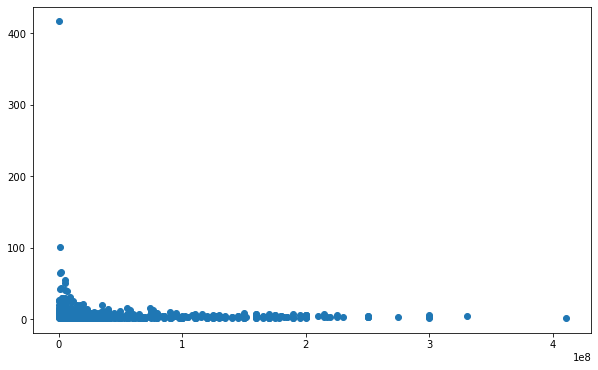

In [57]:
fix, ax = plt.subplots(figsize=(10,6))

ax.scatter(x='production_budget', y='return_on_investment', data=df1);

In [60]:
#find slope 'm'
def slope(x, y):
    rho = np.corrcoef(x, y)[0][1]
    s_y = y.std()
    s_x = x.std()

    m = rho * s_y / s_x
    return m
    
m = slope(df1['production_budget'], df1['return_on_investment'])

In [62]:
#find intercept 'c'
def intercept(m, x, y):
    y_mean = y.mean()
    x_mean = x.mean()

    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c
    
c = intercept(m, df1['production_budget'], df1['return_on_investment'])

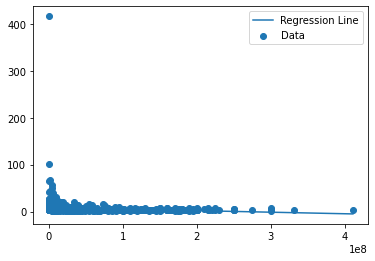

In [63]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line")
    ax.legend()
    
best_fit(df1['production_budget'], df1['return_on_investment'])

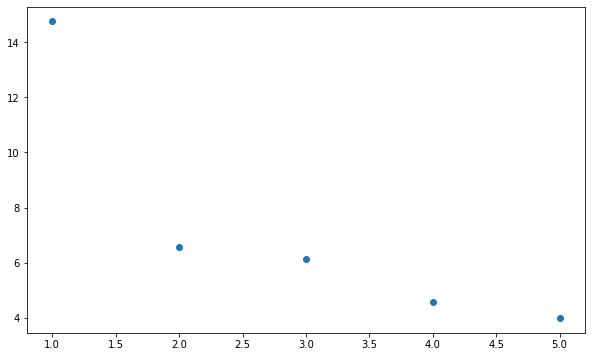

In [65]:
#using means inseatd of raw data
fix, ax = plt.subplots(figsize=(10,6))

ax.scatter(x='Tiers', y='ROI_Mean', data=scatter_df);

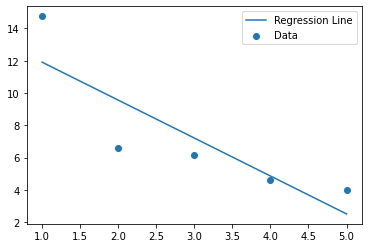

In [66]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line")
    ax.legend()
    
best_fit(scatter_df['Tiers'], scatter_df['ROI_Mean'])